# Weather Py Homework

# Trends
-The highest temperature concentrations occur when latitude is between 20 and 40 degrees.

-When latitude is between 40 and 80 degrees, a high concentration of cities have humidity's around 80%

-The highest wind speeds were found when latitude was between 40 and 60 degrees. 

In [21]:
#starter code
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from pprint import pprint
from citipy import citipy
from APIkey import apikey


In [2]:
url = "http://api.openweathermap.org/data/2.5/weather?"


In [3]:
# Output File (CSV)
output_data_file = "../cities.csv"

In [4]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
codes = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    #code = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code

    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
    
    #if code not in codes:
       # codes.append(code)
        
        

# Print the city count to confirm sufficient count
len(cities)

597

# API Call

In [6]:
#base url
url = "http://api.openweathermap.org/data/2.5/weather?"

#units
units = "Imperial"

#query url
query_url = f"{url}appid={apikey}&units={units}&q="

In [7]:
print('Beginning Data Analysis')
print('-----------------------')
for city in cities:
    print(query_url + city)
    
print('Data Retrevial Complete')

Beginning Data Analysis
-----------------------
http://api.openweathermap.org/data/2.5/weather?appid=fe2a12e4147fcf1861e5156b8cf0406d&units=Imperial&q=cape town
http://api.openweathermap.org/data/2.5/weather?appid=fe2a12e4147fcf1861e5156b8cf0406d&units=Imperial&q=bredasdorp
http://api.openweathermap.org/data/2.5/weather?appid=fe2a12e4147fcf1861e5156b8cf0406d&units=Imperial&q=asau
http://api.openweathermap.org/data/2.5/weather?appid=fe2a12e4147fcf1861e5156b8cf0406d&units=Imperial&q=narsaq
http://api.openweathermap.org/data/2.5/weather?appid=fe2a12e4147fcf1861e5156b8cf0406d&units=Imperial&q=ilulissat
http://api.openweathermap.org/data/2.5/weather?appid=fe2a12e4147fcf1861e5156b8cf0406d&units=Imperial&q=corn island
http://api.openweathermap.org/data/2.5/weather?appid=fe2a12e4147fcf1861e5156b8cf0406d&units=Imperial&q=tsihombe
http://api.openweathermap.org/data/2.5/weather?appid=fe2a12e4147fcf1861e5156b8cf0406d&units=Imperial&q=sivas
http://api.openweathermap.org/data/2.5/weather?appid=fe2a1

In [8]:
#looping through the cities list with an API call for the lat and long
#taking the info and appending it to lists

lat = []
temp = []
cloud = []
wind = []
humidity = []
country = []
name = []
long = []
time = []

#need to figure out the spacing for the try and except portion of the for loop
#need to use a try and exempt case 

#need to figure out how to run this for loop, when i take out the try and except clause a certain point it will stop running

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp_max'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        humidity.append(response['main']['humidity'])
        name.append(response['name'])
        long.append(response['coord']['lon'])
        time.append(response['dt'])
        country.append(response['sys']['country'])
    except KeyError:
        print('Skip')


Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip


In [9]:
#create dataframe
summary_df = pd.DataFrame({'Name': name,
                          'Cloudiness': cloud,
                          'Country': country,
                          'Date': time,
                          'Humidity': humidity,
                          'Lat': lat,
                          'Long': long,
                          'Max Temp': temp,
                          'Wind Speed':wind})
summary_df.head()

,Name,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,Cape Town,0,ZA,1539975600,59,-33.93,18.42,60.80,23.04
1,Bredasdorp,20,ZA,1539975600,62,-34.53,20.04,59.00,8.05
2,Narsaq,75,GL,1539975000,79,60.91,-46.05,32.00,3.36
3,Ilulissat,40,GL,1539975000,52,69.22,-51.10,15.80,10.29
4,Corn Island,64,NI,1539978919,100,12.17,-83.04,79.47,5.19


In [10]:
summary_df.count()

Name          540
Cloudiness    540
Country       540
Date          540
Humidity      540
Lat           540
Long          540
Max Temp      540
Wind Speed    540
dtype: int64

# Latitude v Temperature Graph

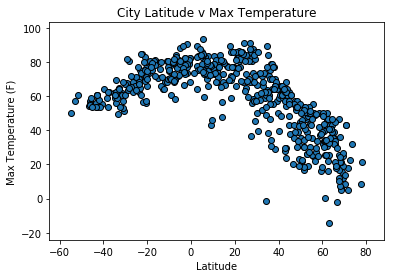

<Figure size 432x288 with 0 Axes>

In [12]:
maxlat = max(summary_df['Lat'])
minlat = min(summary_df['Lat'])
hightemp = max(summary_df['Max Temp'])
lowtemp = min(summary_df['Max Temp'])
x = summary_df['Lat']
y = summary_df['Max Temp']
plt.xlim(minlat -10, maxlat +10)
plt.ylim(lowtemp -10 , hightemp +10)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude v Max Temperature')


plt.scatter(x,y, edgecolors= 'black')
plt.show()
plt.savefig('Temp.png')

try:
    response = requests.get()
    lat.append()
    lng.append()
    etc
except networkError:
    print("skip")

for element in list:
    if(condition):
        #do nothing
    else:
        element = element + 1

# Latitude v Humidity Graph

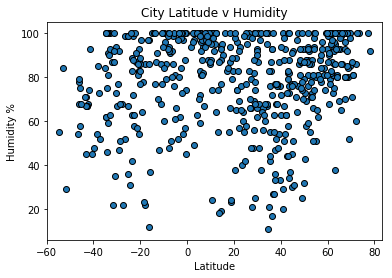

<Figure size 432x288 with 0 Axes>

In [13]:
#Lat v Humidity
highhumidity = max(summary_df['Humidity'])
lowhumidity = min(summary_df['Humidity'])
x2 = summary_df['Lat']
y2 = summary_df['Humidity']
plt.xlim(minlat-5,maxlat+5)
plt.ylim(lowhumidity-5, highhumidity+5)
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('City Latitude v Humidity')

plt.scatter(x2,y2, edgecolors= 'black')
plt.show()
plt.savefig('Humid.png')

# Latitude v Cloudiness Graph

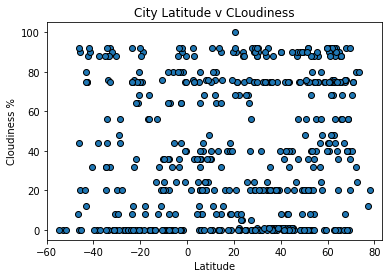

<Figure size 432x288 with 0 Axes>

In [14]:
#Lat v Cloud
highcloud = max(summary_df['Cloudiness'])
lowcloud = min(summary_df['Cloudiness'])
x3 = summary_df['Lat']
y3 = summary_df['Cloudiness']
plt.xlim(minlat -5, maxlat +5)
plt.ylim(lowcloud -5, highcloud +5)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('City Latitude v CLoudiness')
plt.scatter(x3,y3, edgecolors= 'black')
plt.show()
plt.savefig('Cloud.png')

# Latitude v Wind Graph

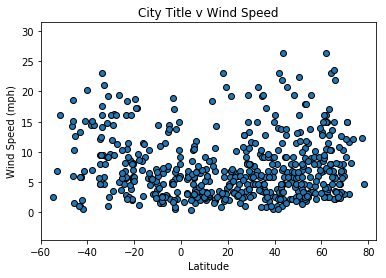

<Figure size 432x288 with 0 Axes>

In [15]:
#Lat v Wind
lowwind = min(summary_df['Wind Speed'])
highwind = max(summary_df['Wind Speed'])
x4 = summary_df['Lat']
y4 = summary_df['Wind Speed']
plt.xlim(minlat -5, maxlat +5)
plt.ylim(lowwind-5, highwind +5)
plt.title('City Title v Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.scatter(x4,y4, edgecolors= 'black')
plt.show()
plt.savefig('Wind.png')

In [16]:
#export to CSV...
summary_df.to_csv(output_data_file)